In [1]:
#Loading modules

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Features
from rdkit.Chem import Fragments as fr
from rdkit.Chem import rdMolDescriptors
import tensorflow as tf

import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

from sklearn import metrics
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
predictions = pd.read_csv('prediction.csv')
predictions

,Unnamed: 0,ids,tox_bin,prediction
0,0,O=S(=O)([O-])c1cc(O)ccc1O,0,0.547206
1,1,Cc1cn([C@H]2C=C[C@@H](CO)O2)c(=O)[nH]c1=O,0,0.246894
2,2,CCCCc1nc2cccnc2n1Cc1ccc(-c2ccccc2-c2nnn[n-]2)cc1,1,0.698589
3,3,CCN(CC)CCOC(=O)C1(c2ccccc2)CCCC1.CCN(CC)CCOC(=...,0,0.424995
4,4,CC(=O)SC[C@@H](C)C(=O)N1CCC[C@H]1C(=O)N[C@@H](...,0,0.304463
...,...,...,...,...
778,778,C1CSCCS1,0,0.591752
779,779,CC(=O)CC(C)(C)O,0,0.305277
780,780,CC(C)=CCNc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](...,1,0.343047
781,781,COc1ccc(CN2CCN(C(c3ccc(F)cc3)c3ccc(F)cc3)CC2)c...,1,0.510794


In [11]:
sorted_df = predictions.sort_values(by=['prediction'], ascending=False, ignore_index=True)
sorted_df

,Unnamed: 0,ids,tox_bin,prediction
0,700,CC(C(O)c1ccccc1)N(C)CCOC(c1ccccc1)c1ccccc1,0,0.976399
1,398,IC(I)I,1,0.972524
2,333,Cc1cc(O)c2c(c1)C(=O)c1cc(O)cc(O)c1C2=O,1,0.971642
3,42,Nc1c(Cl)cc(Cl)cc1Cl,0,0.971518
4,429,C1CC2OC2CC1C1CO1,0,0.969301
...,...,...,...,...
778,441,C#CC(C)(C)O,0,0.170571
779,326,COc1nc(C)nc(NC(=O)NS(=O)(=O)c2ccccc2OCCCl)n1,0,0.160016
780,575,CCN[C@@H]1C[C@H](N)[C@@H](OC2OC(CN)=CCC2N)[C@H...,0,0.145643
781,365,CCc1c(C)[nH]c2c1C(=O)C(CN1CCOCC1)CC2,0,0.129314


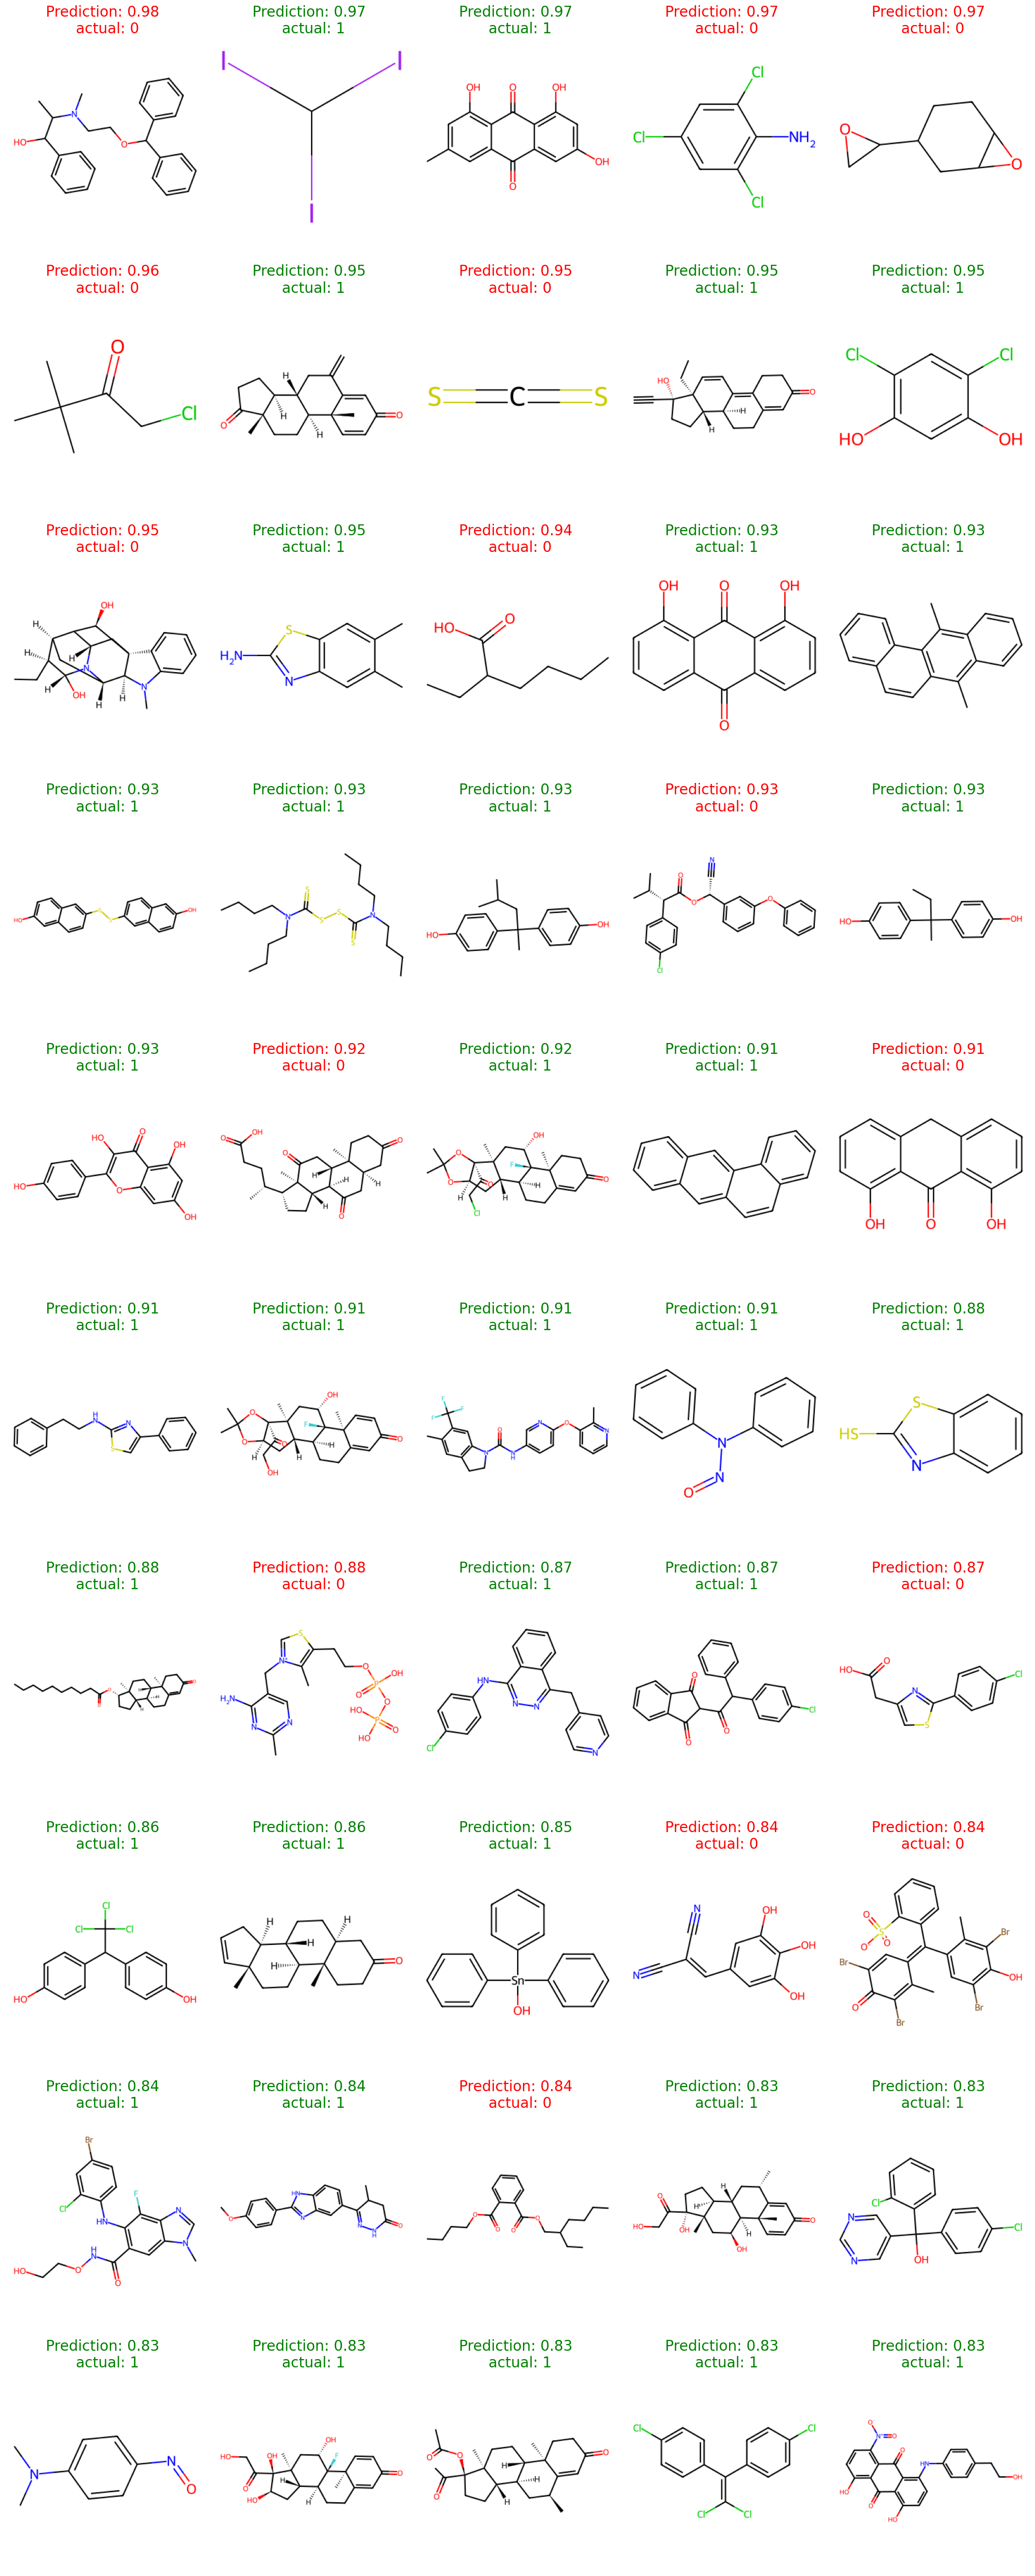

In [41]:
from rdkit.Chem import Draw


def correct(y_true, y_pred):
    threshold = 0.4
    y_pred = np.where(y_pred >= threshold, 1, 0)
    return y_pred == y_true

colors = {False: 'red', True: 'green'}

def plot_molecule(smiles, prediction, tox_bin, ax):
    mol = Chem.MolFromSmiles(smiles)
    ax.set_title(f'Prediction: {round(prediction, 2)} \n actual: {tox_bin}', color=colors[correct(tox_bin, prediction)], fontsize=20)

    img = Draw.MolToImage(mol)
    ax.imshow(img)
    ax.axis('off')



# Create the grid of molecule plots
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 50))



for i, row in sorted_df.head(50).iterrows():
    smiles = row['ids']
    prediction = row['prediction']
    tox_bin = row['tox_bin']

    ax = axes[i // 5][i % 5]

    plot_molecule(smiles, prediction, tox_bin, ax)
    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between plots

plt.tight_layout()
plt.show()

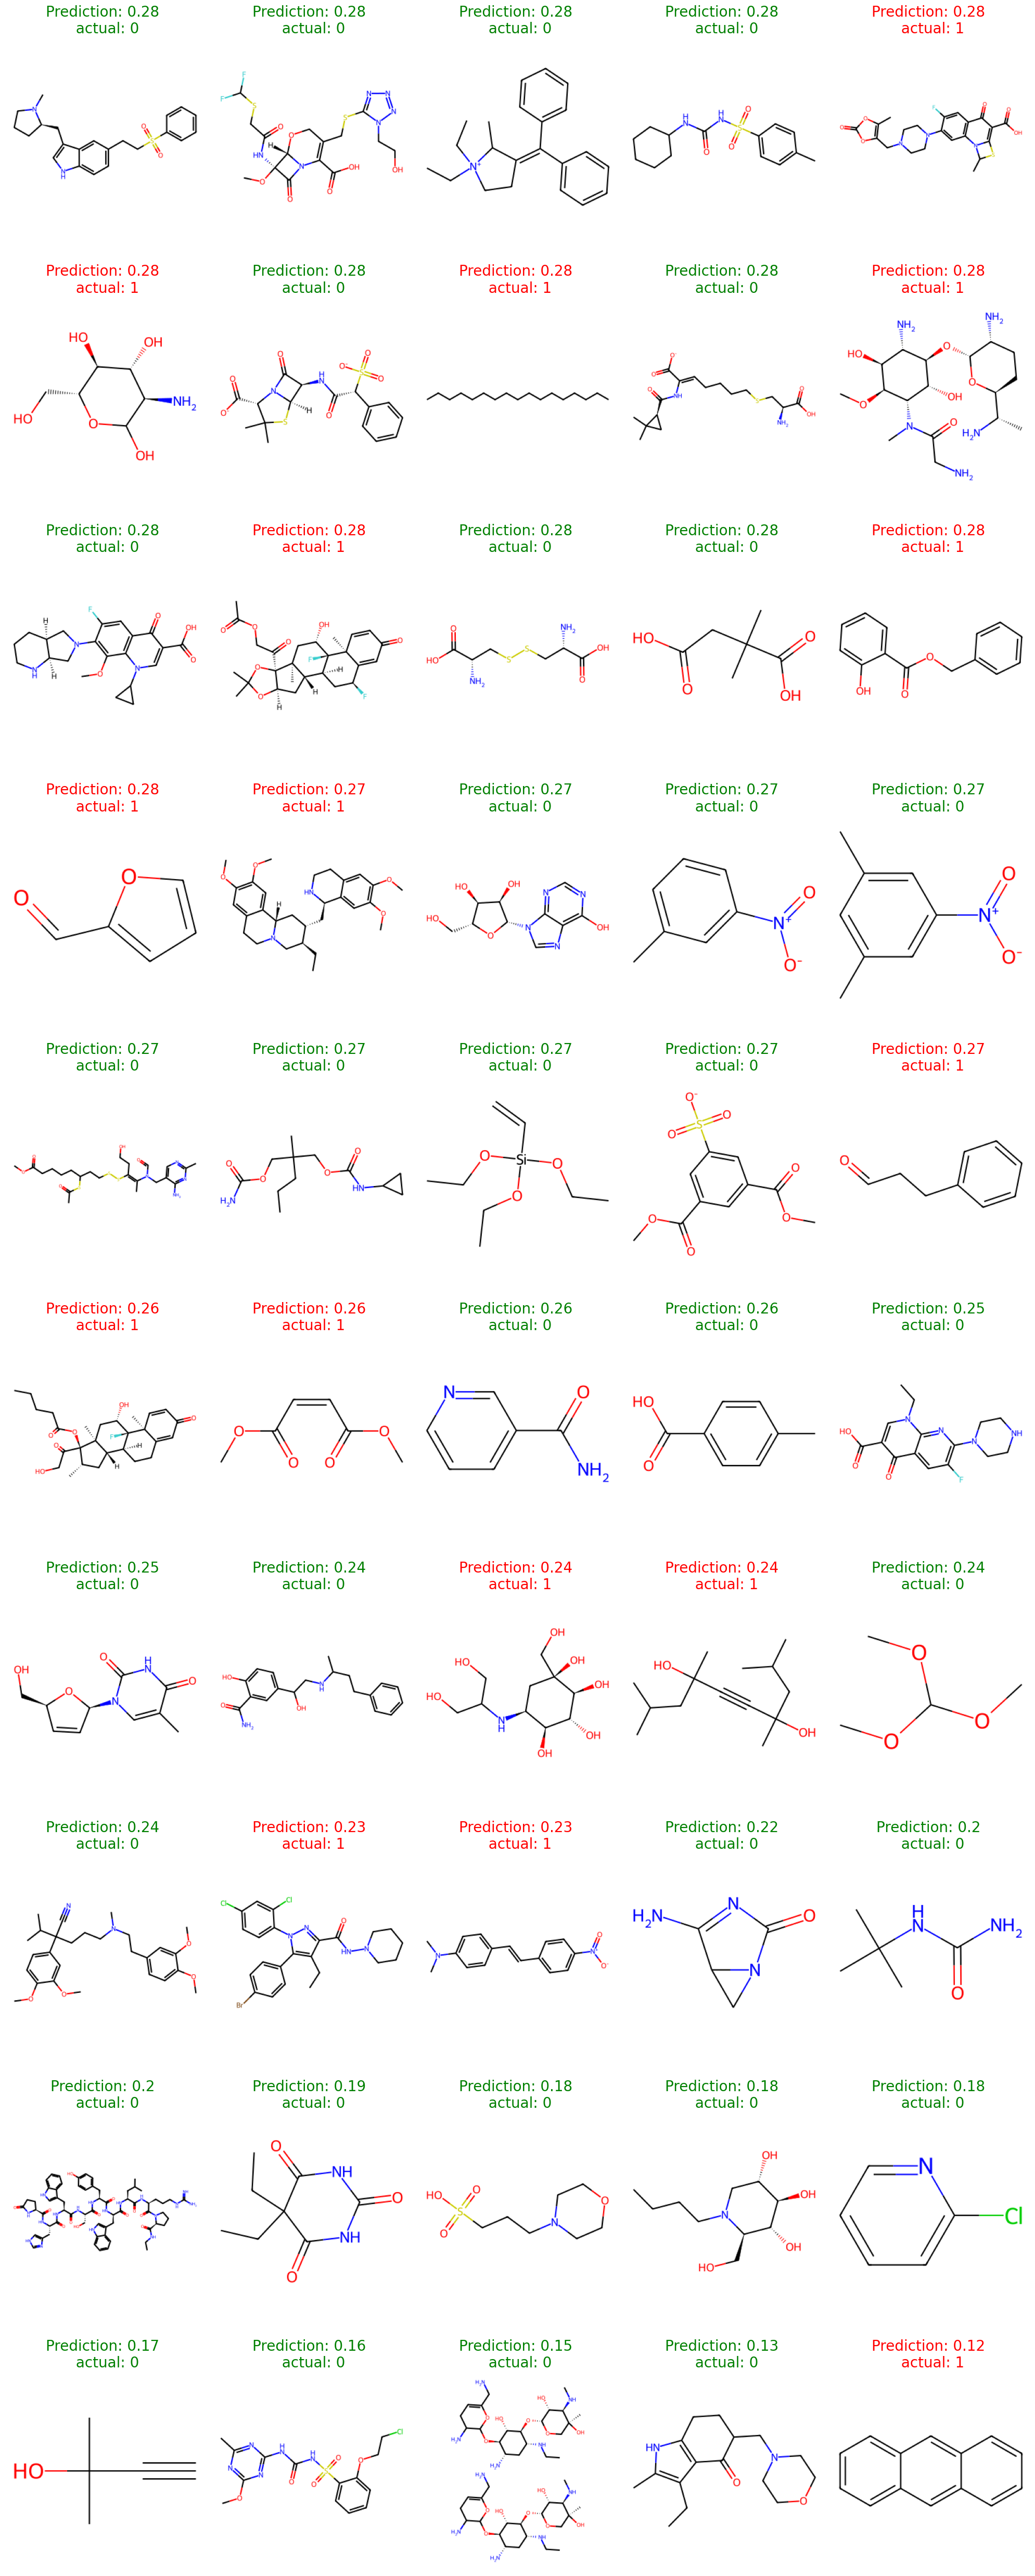

In [45]:
# Create the grid of molecule plots
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 50))


for i, row in sorted_df.tail(50).reset_index(drop=True).iterrows():
    smiles = row['ids']
    prediction = row['prediction']
    tox_bin = row['tox_bin']

    ax = axes[i // 5][i % 5]

    plot_molecule(smiles, prediction, tox_bin, ax)
    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between plots

plt.tight_layout()
plt.show()